<a href="https://colab.research.google.com/github/silversilencee/Customer_Churn/blob/main/Customer_Churn_(eda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Analysis

Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

**Load the data file**

In [ ]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Look at the top 5 records of data

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [ ]:
hd = dataset
hd.StreamingMovies.replace({"No internet service":"No"}, inplace=True)
hd.OnlineSecurity.replace({"No internet service":"No"}, inplace=True)
hd.OnlineBackup.replace({"No internet service":"No"}, inplace=True)
hd.DeviceProtection.replace({"No internet service":"No"}, inplace=True)
hd.TechSupport.replace({"No internet service":"No"}, inplace=True)
hd = hd.drop(['StreamingTV'], axis='columns')
df = pd.get_dummies(dataset.StreamingTV)
df=df.drop(["No"], axis='columns')
df.rename(columns={'No internet service':'no_internet_service'}, inplace=True)
df.rename(columns={'Yes':'StreamingTV'}, inplace=True)
hd = pd.concat([hd, df], axis='columns')
hd.MultipleLines.replace({"No phone service":"No"}, inplace=True)
hd.MultipleLines.head(10)

0     No
1     No
2     No
3     No
4     No
5    Yes
6    Yes
7     No
8    Yes
9     No
Name: MultipleLines, dtype: object

In [ ]:
hd.shape

(7043, 22)

In [ ]:
hd.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'no_internet_service', 'StreamingTV'], dtype=object)

In [ ]:
# Checking the data types of all the columns
hd.dtypes

customerID              object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
tenure                   int64
PhoneService            object
MultipleLines           object
InternetService         object
OnlineSecurity          object
OnlineBackup            object
DeviceProtection        object
TechSupport             object
StreamingMovies         object
Contract                object
PaperlessBilling        object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges            object
Churn                   object
no_internet_service      uint8
StreamingTV              uint8
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
hd.describe()

,SeniorCitizen,tenure,MonthlyCharges,no_internet_service,StreamingTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.216669,0.384353
std,0.368612,24.559481,30.090047,0.412004,0.486477
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

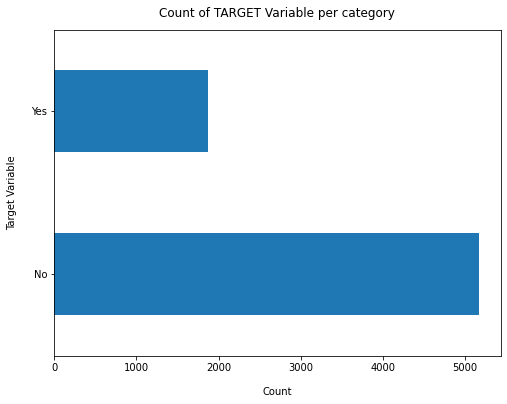

In [ ]:
hd['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
hd['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
100*hd['Churn'].value_counts()/len(hd['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

*   Data is highly imbalanced, ratio = 73:27
*   So we analyse the data with other features while taking the target values separately to get some insights.

In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
hd.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   object 
 7   MultipleLines        7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   OnlineSecurity       7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  StreamingMovies      7043 non-null   object 
 14  Contract             7043 non-null   object 
 15  PaperlessBilling     7043 non-null   o

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


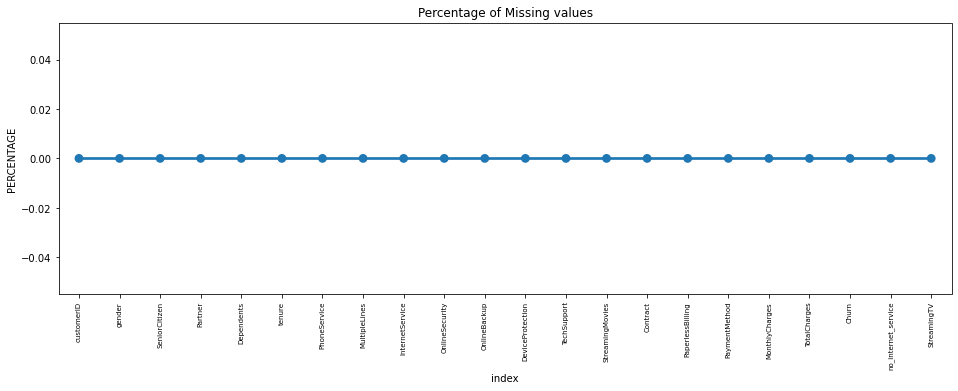

In [ ]:
missing = pd.DataFrame((hd.isnull().sum())*100/hd.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - Initial Intuition
* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# **Data Cleaning**


**1.** Create a copy of base data for manupulation & processing

In [ ]:
td = pd.DataFrame(data=hd)

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [ ]:
td.TotalCharges = pd.to_numeric(td.TotalCharges, errors='coerce')
td.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges           11
Churn                   0
no_internet_service     0
StreamingTV             0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [ ]:
td.loc[td ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,no_internet_service,StreamingTV
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,1
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,Two year,No,Mailed check,20.25,NaN,No,1,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Two year,No,Mailed check,80.85,NaN,No,0,1
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,Two year,No,Mailed check,25.75,NaN,No,1,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,1
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,Two year,No,Mailed check,19.85,NaN,No,1,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,Two year,No,Mailed check,25.35,NaN,No,1,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,Two year,No,Mailed check,20.00,NaN,No,1,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,One year,Yes,Mailed check,19.70,NaN,No,1,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,1


**4.** Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
#Removing missing values 
td.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**6.** Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
td.drop(columns= ['customerID'], axis=1, inplace=True)
td.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,no_internet_service,StreamingTV
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0


# **Data Exploration**

**1.** Plot distibution of individual predictors by churn


## Univariate Analysis

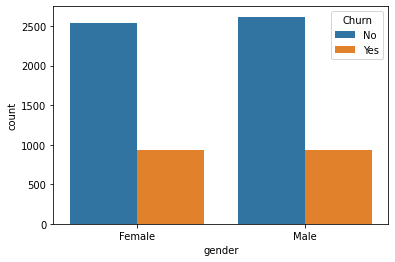

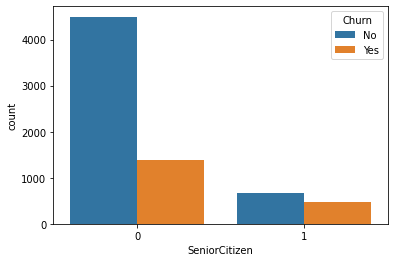

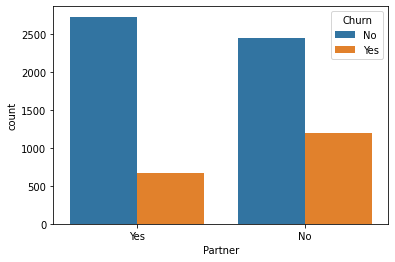

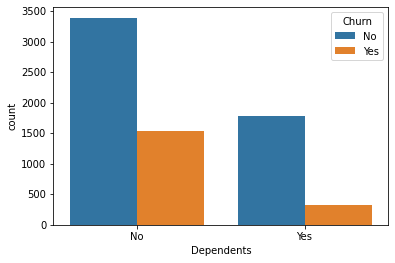

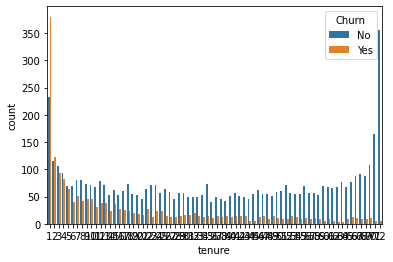

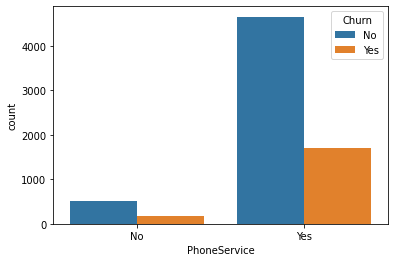

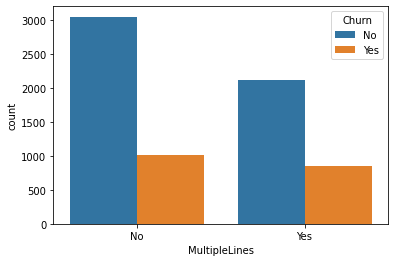

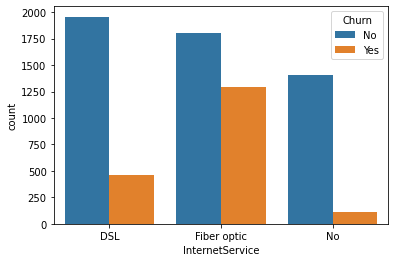

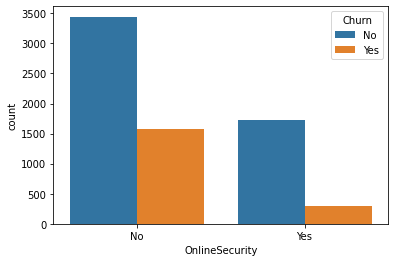

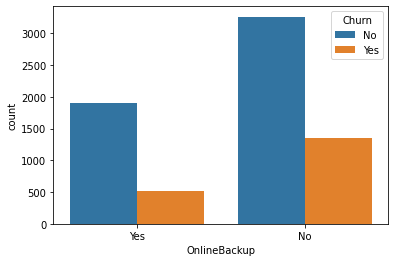

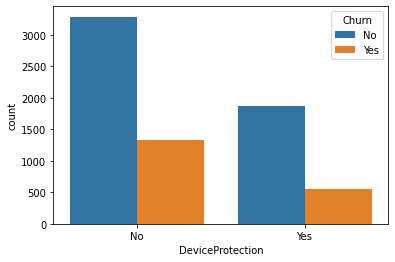

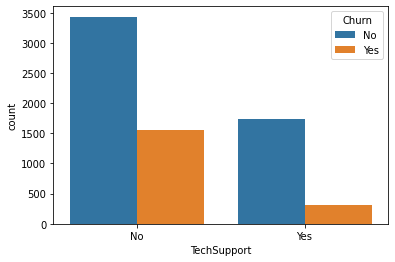

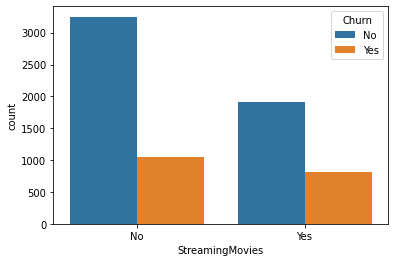

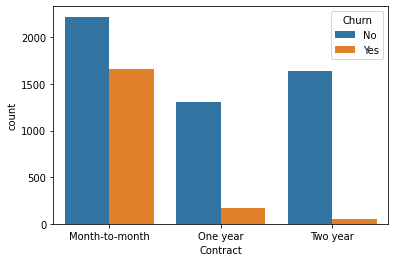

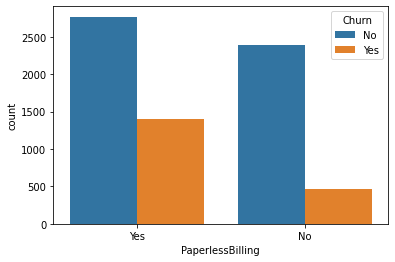

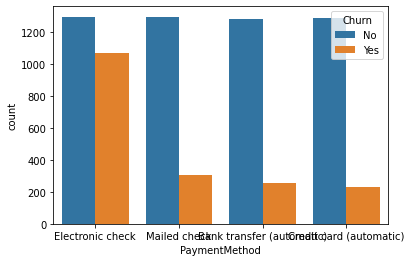

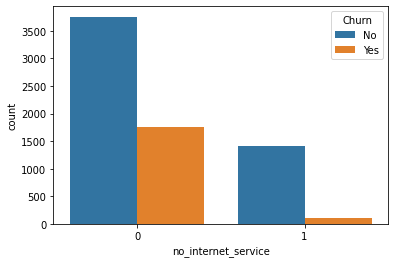

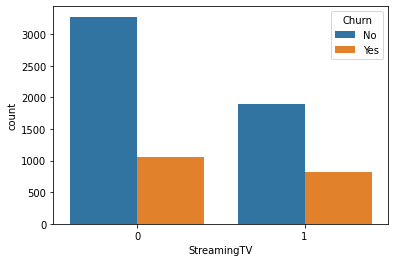

In [ ]:
for i, predictor in enumerate(td.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=td, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [ ]:
td['Churn'] = np.where(td.Churn == 'Yes',1,0)
td['Partner'] = np.where(td.Partner == 'Yes',1,0)
td['Dependents'] = np.where(td.Dependents == 'Yes',1,0)
td['PhoneService'] = np.where(td.PhoneService == 'Yes',1,0)
td['MultipleLines'] = np.where(td.MultipleLines == 'Yes',1,0)
td['OnlineSecurity'] = np.where(td.OnlineSecurity == 'Yes',1,0)
td['OnlineBackup'] = np.where(td.OnlineBackup == 'Yes',1,0)
td['DeviceProtection'] = np.where(td.DeviceProtection == 'Yes',1,0)
td['TechSupport'] = np.where(td.TechSupport == 'Yes',1,0)
td['StreamingMovies'] = np.where(td.StreamingMovies == 'Yes',1,0)
td['PaperlessBilling'] = np.where(td.PaperlessBilling == 'Yes',1,0)
td['gender'] = np.where(td.gender == 'Male',1,0)

In [ ]:
td.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,no_internet_service,StreamingTV
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,1889.50,0,0,0
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,0
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,0



**3.** Convert all the categorical variables into dummy variables

In [ ]:
td = pd.get_dummies(td)
td.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


**9.** Relationship between Monthly Charges and Total Charges

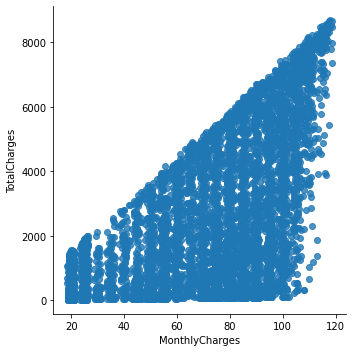

In [ ]:
sns.lmplot(data=td, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**10.** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

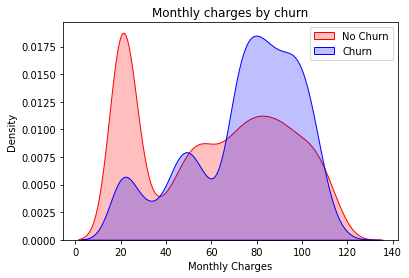

In [ ]:
Mth = sns.kdeplot(td.MonthlyCharges[(td["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(td.MonthlyCharges[(td["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

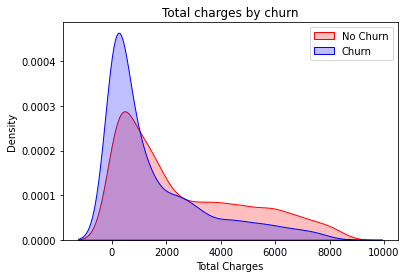

In [ ]:
Tot = sns.kdeplot(td.TotalCharges[(td["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(td.TotalCharges[(td["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.**


**11.** Build a corelation of all predictors with 'Churn'

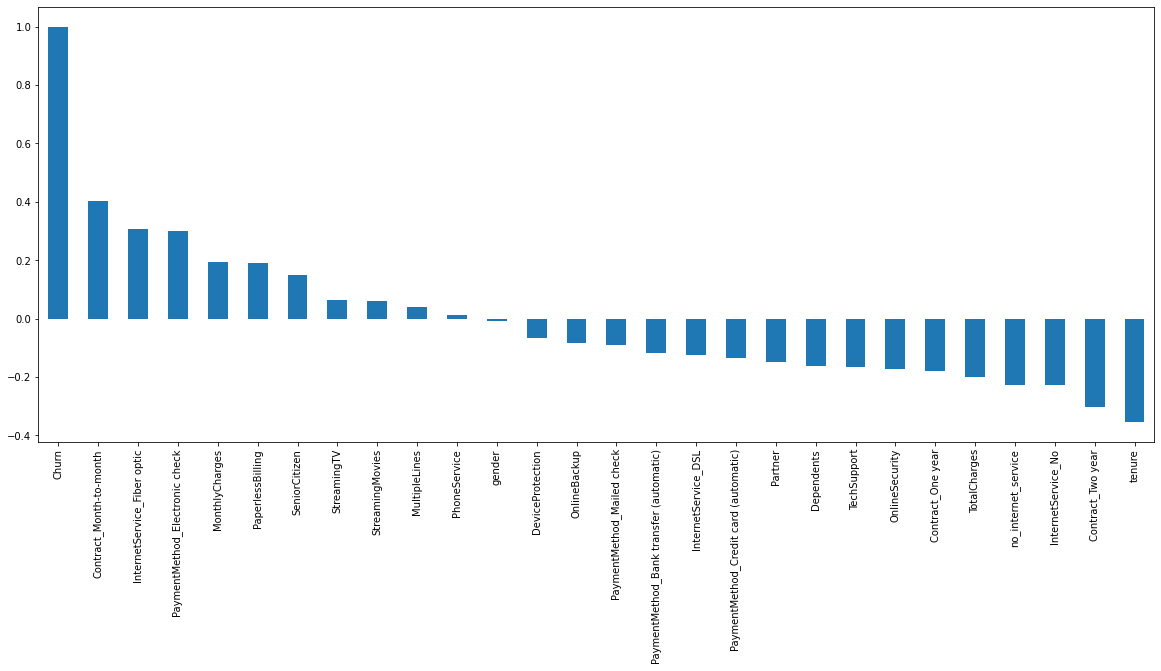

In [ ]:
plt.figure(figsize=(20,8))
td.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

**HIGH** Churn seen in case of **Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years**

Factors like **Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn**

This is also evident from the **Heatmap** below

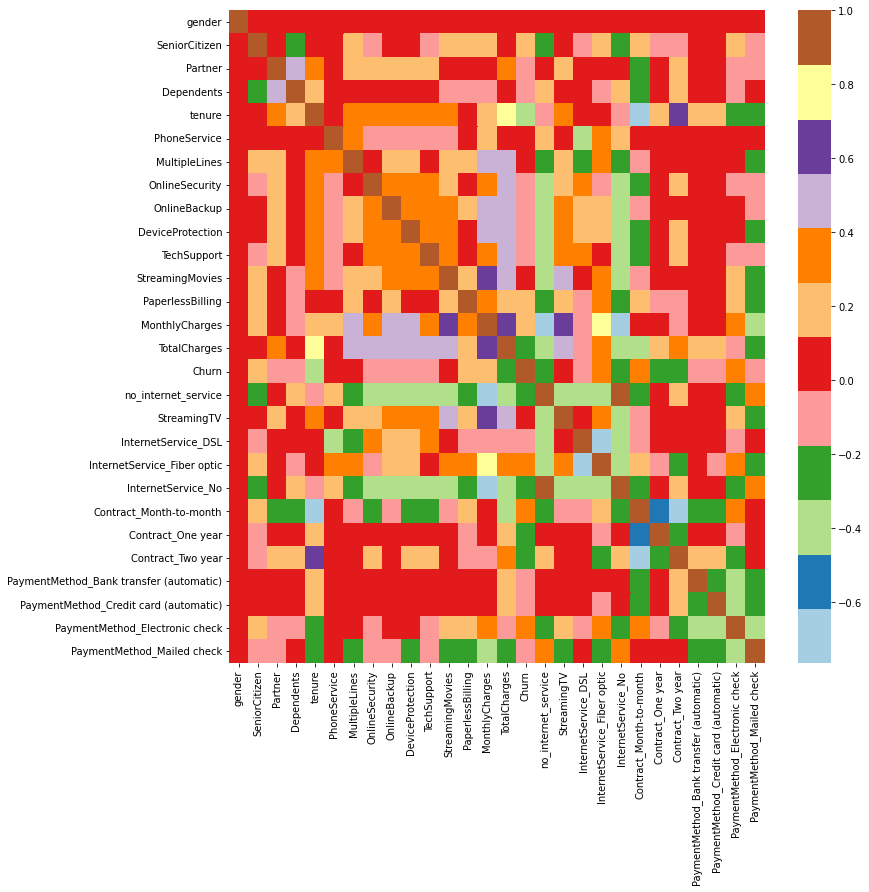

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(td.corr(), cmap="Paired")

## Bivariate Analysis

In [ ]:
new_df1_target0=td.loc[td["Churn"]==0]
new_df1_target1=td.loc[td["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

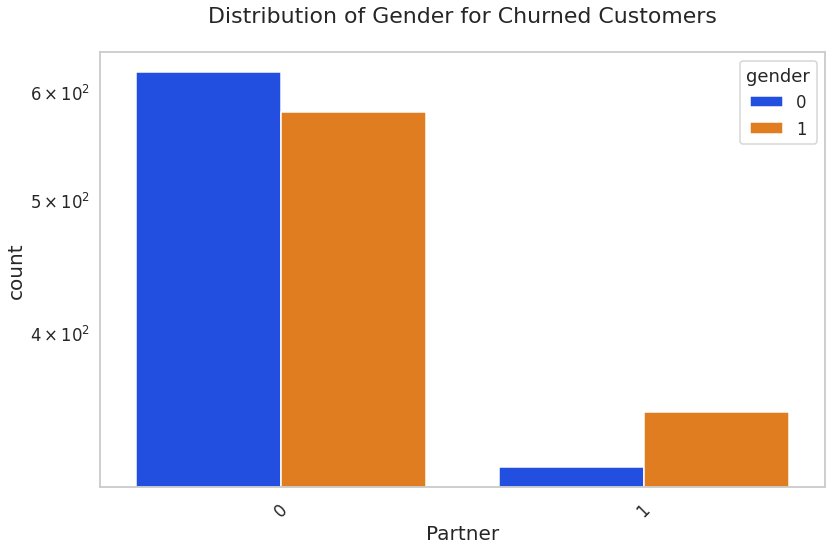

In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

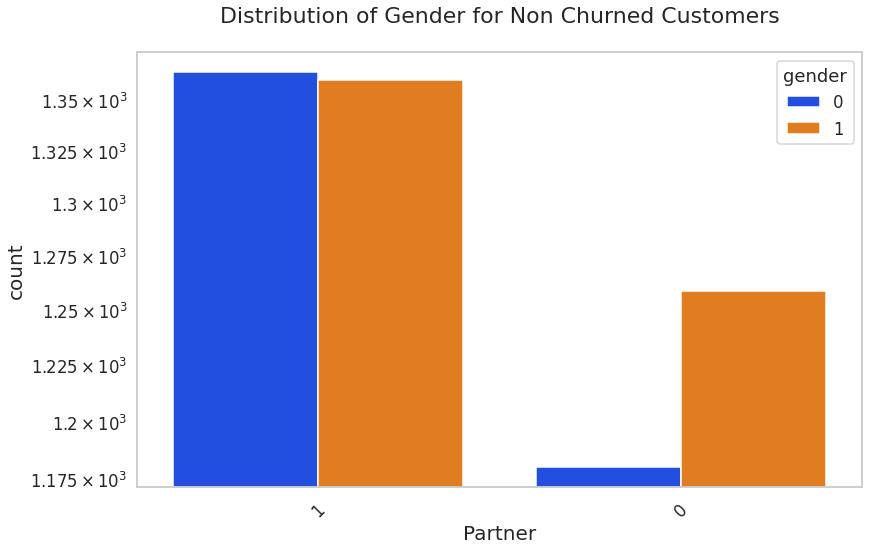

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

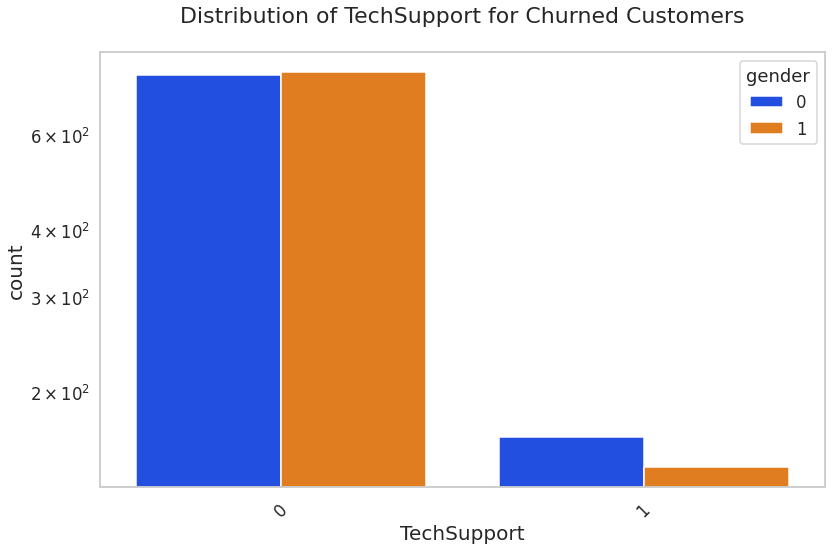

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

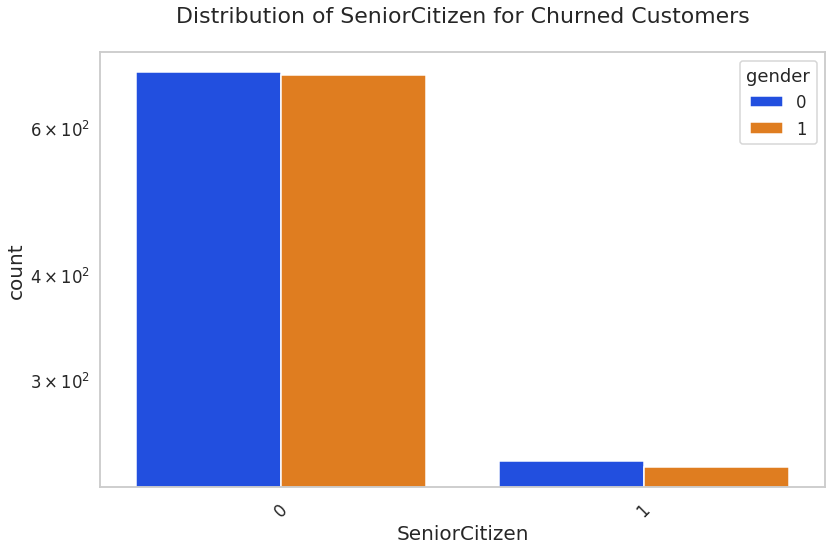

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [ ]:
td.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# **CONCLUSION**
These are some of the quick insights from this exercise:
1.   Electronic check medium are the highest churners.
2.   Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3.   No Online security, No Tech Support category are high churners.
4.   Non senior Citizens are high churners

**Note:** There could be many more such insights, so take this as an assignment and try to get more insights :)

In [ ]:
td.to_csv('tel_churn.csv')